# Multiple linear regression and adjusted R-squared

## Import the relevant libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [115]:
!unzip "Multiple linear regression - Dataset.zip" && rm "Multiple linear regression - Dataset.zip"

unzip:  cannot find or open Multiple linear regression - Dataset.zip, Multiple linear regression - Dataset.zip.zip or Multiple linear regression - Dataset.zip.ZIP.


## Load the data

In [116]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [117]:
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [118]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


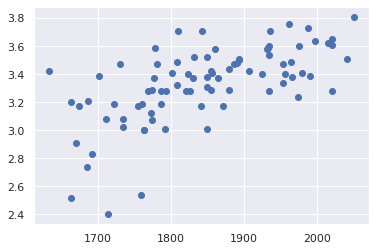

In [119]:
plt.figure()
plt.scatter(data['SAT'],data['GPA'])

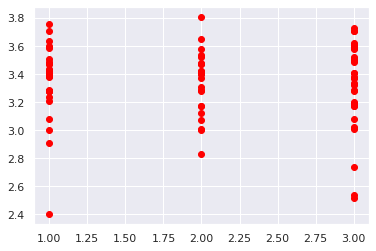

In [120]:
plt.figure()
plt.scatter(data['Rand 1,2,3'],data['GPA'],c='red')

## Create first multiple regression

In [121]:
y = data ['GPA']
x1 = data.drop(['GPA'],axis=1)

In [122]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [123]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           6.58e-10
Time:                        17:24:41   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Conclusion from The Model Summary
By looking at the p-value of each feature, we can see that the constant and Rand 1,2,3 features have p-value > 0.05 (5%) which means that these features have low impact to the model. Thus, we can just remove these features from our model.

The R-squared tells us about the model's accuracy or how well our model fits the data without penalizing the excessive use of feature while the adjusted R-squared tells us about the model's accuracy but penalizes the excessive use of feature.

#Create a Second Multiple Regression with Less Feature
Dropping features that has no powers to predict from previous model

In [124]:
x2 = data.drop(['GPA','Rand 1,2,3'],axis=1)
x = sm.add_constant(x2)
results2 = sm.OLS(y,x).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [125]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.20e-11
Time:                        17:24:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistics indicates the insignificancy of the model.

The lower the F-statistics means the more insignificant the model is (not a good model)

Text(0, 0.5, 'GPA')

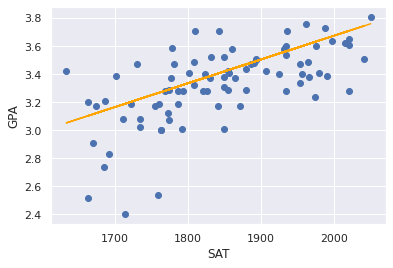

In [126]:
yhat = 0.275 + 0.0017*x2
plt.scatter(data['SAT'],data['GPA'],)
plt.plot(data['SAT'],yhat,c='orange')
plt.xlabel('SAT')
plt.ylabel('GPA')

In [127]:
data.corr()

,SAT,"Rand 1,2,3",GPA
SAT,1.000000,-0.031722,0.637184
"Rand 1,2,3",-0.031722,1.000000,-0.046224
GPA,0.637184,-0.046224,1.000000


#Machine Learning with Scikit-Learn

#Linear Regression

In [128]:
import sklearn
from sklearn.linear_model import LinearRegression

In [129]:
data 

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [130]:
#Transform input and target to 1-dimensional array from 0-dimensional 
X = np.array(data['SAT']).reshape(-1,1) #-1 means ignore the number of item (in this case this is 84)
y = np.array(data['GPA']).reshape(-1,1)
reg_model = LinearRegression()
reg_model.fit(X,y)

LinearRegression()

In [131]:
#Getting the coefficient of the LinearRegression model (from y = mx+b or y = m1x1+m2x2+...+b)
reg_model.coef_

array([[0.00165569]])

In [132]:
#Getting the intercept(b) (from y=mx+b ...)
reg_model.intercept_

array([0.2750403])

In [133]:
#Getting the function for the linear regression
yhat = 0.2750403 + data['SAT']*0.00165569

Text(0, 0.5, 'GPA')

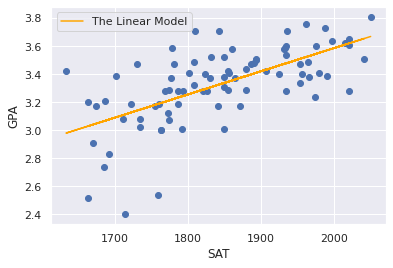

In [134]:
#Plotting the model based on the coef and intercept we got from the reg_model
#Since there is only 1 feature , we can graph it
#If there are more than 1 feature, we can't vizualize with graph
plt.figure()
plt.scatter(x=data['SAT'],y=data['GPA'])
plt.plot(data['SAT'],yhat,c='orange',label='The Linear Model')
plt.legend()
plt.xlabel('SAT')
plt.ylabel('GPA')

In [135]:
#Test to predict something
reg_model.predict(np.array([1740]).reshape(-1,1)) #Using the machine

array([[3.15593751]])

In [136]:
print(0.2750403 + (1740)*0.00165569) #Manual prediction

3.1559409


In [137]:
pred_data = pd.DataFrame({
    'SAT':[1740,1760]
})
pred_data

,SAT
0,1740
1,1760


In [138]:
pred = pd.DataFrame(data=reg_model.predict(pred_data),columns=['Predicted GPA'])
pred = pd.concat([pred_data,pred],axis=1)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


#Multiple Linear Regression

In [139]:
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [140]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [141]:
X = data.drop(['GPA'],axis=1)
y = data['GPA']

reg_model2 = LinearRegression()
reg_model2.fit(X,y)

LinearRegression()

In [142]:
#R-squared of the model
reg_model2.score(X,y)

0.40668119528142843

In [143]:
reg_model2.coef_

array([ 0.00165354, -0.00826982])

In [144]:
reg_model2.feature_names_in_

array(['SAT', 'Rand 1,2,3'], dtype=object)

In [145]:
reg_model2.intercept_

0.29603261264909486

In [146]:
#yhat = 0.29603261264909486 + 0.00165354*data['SAT'] + -0.00826982*data['Rand 1,2,3']
#yhat means the y(output) of prediction while y means the real output from the data

reg_model2.predict(np.array([1740,1]).reshape(1,2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.16492552])

In [147]:
print(0.29603261264909486 + 0.00165354*1740 + -0.00826982*1)

3.164922392649095


#Finding the p-value of each feature for selection

In [148]:
from sklearn.feature_selection import f_regression

In [149]:
f_regression(X,y)
f_statistics = f_regression(X,y)[0]
p_values = f_regression(X,y)[1]

In [150]:
p_values.round(3)

array([0.   , 0.676])

Creating summary table

In [151]:
summary = pd.DataFrame({
    'features':reg_model2.feature_names_in_,
    'coeficient':reg_model2.coef_,
    'p-values':p_values.round(3),
    'F-statistic':f_statistics.round(2)
})
summary

,features,coeficient,p-values,F-statistic
0,SAT,0.001654,0.000,56.05
1,"Rand 1,2,3",-0.008270,0.676,0.18


#Feature Scaling

Standar Scaler

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit(X)
x_scaled = scaler.transform(X)

In [155]:
x_scaled.shape

(84, 2)

Creting another model with scaled feature

In [156]:
reg_model3 = LinearRegression()
reg_model3.fit(x_scaled,y)

LinearRegression()

Getting the summary

In [157]:
f_statistics = f_regression(x_scaled,y)[0]
p_values = f_regression(x_scaled,y)[1]

summary = pd.DataFrame({
    'Feature':reg_model2.feature_names_in_,
    'coeficient':reg_model3.coef_,
    'p-value':p_values.round(3),
    'F-statistics':f_statistics.round(2)
})
summary

,Feature,coeficient,p-value,F-statistics
0,SAT,0.171814,0.000,56.05
1,"Rand 1,2,3",-0.007030,0.676,0.18


In [158]:
reg_model3.intercept_ #intercept == bias

3.330238095238095

Making prediction to the scaled model

In [159]:
#making a dummy data to make prediction
pred_data = pd.DataFrame({
    'SAT':[1700,1800],
    'Rand 1,2,3':[1,2]
})
pred_data

,SAT,"Rand 1,2,3"
0,1700,1
1,1800,2


In [160]:
pred = reg_model3.predict(pred_data)
pred = pd.DataFrame({'Predicted GPA':pred})
pred = pd.concat([pred_data,pred],axis=1)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,"Rand 1,2,3",Predicted GPA
0,1700,1,295.406826
1,1800,2,312.581185


As we can see, there is no way that the GPA exceed 4.0

This happened because we used the scaled data to train the model

So, we also need to scale the data to predict

In [161]:
#Scaling pred data
scaled_pred_data = scaler.transform(pred_data)
scaled_pred_data

array([[-1.39811928, -1.24637147],
       [-0.43571643, -0.07002087]])

In [162]:
pred = reg_model3.predict(scaled_pred_data)
pred = pd.DataFrame({'Predicted GPA':pred})
pred = pd.concat([pred_data,pred],axis=1)
pred
# Now the predicted GPA is normal

,SAT,"Rand 1,2,3",Predicted GPA
0,1700,1,3.098784
1,1800,2,3.255868


#What if Rand 1,2,3 removed from feature?

In [163]:
reg_model4 = LinearRegression()

x = np.array(X['SAT']).reshape(-1,1)
reg_model4.fit(x,y)

LinearRegression()

In [164]:
f_statistics = f_regression(x,y)[0]
p_values = f_regression(x,y)[1]

summary = pd.DataFrame({
    'Feature':['SAT'],
    'coeficient':reg_model4.coef_,
    'p-value':p_values.round(3),
    'F-statistics':f_statistics.round(2)
})
summary

,Feature,coeficient,p-value,F-statistics
0,SAT,0.001656,0.0,56.05


In [165]:
#making a dummy data to make prediction
pred_data = pd.DataFrame({
    'SAT':[1700,1800]
})

pred = reg_model4.predict(pred_data)
pred = pd.DataFrame({'Predicted GPA':pred})
pred = pd.concat([pred_data,pred],axis=1)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted GPA
0,1700,3.089710
1,1800,3.255279


There is no significant changes in the prediction

It is because the Rand 1,2,3 have a p-value > 0.05 which means it doesn't give much impact to the model